# Task 3
**Author**: Saikiran Rudra

### **Problem Statement**

1. Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
2. As a business manager, try to find out the weak areas where you can work to make more profit
3. What all business problems you can derive by exploring the data?

In [1]:
# importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Category by Quantity

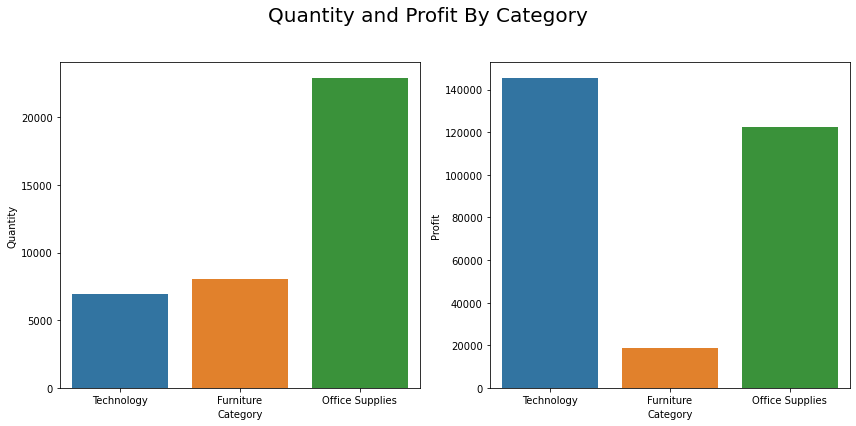

In [3]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Quantity and Profit By Category", fontsize=20)

df_by_category = df.groupby("Category")[["Quantity", "Profit"]].sum().sort_values(by=["Quantity"])

sns.barplot(x=df_by_category.index, y=df_by_category["Quantity"], ax=ax[0])
sns.barplot(x=df_by_category.index, y=df_by_category["Profit"], ax=ax[1])

fig.tight_layout()
fig.subplots_adjust(top=0.85)

As we can see 
**Technology** have <font color="red">**least Quantity**</font> but have <font color="green">**Maximum Profit**</font>

**Furniture** is a category were Business has to work to <font color="green">**Increase Profit**</font>

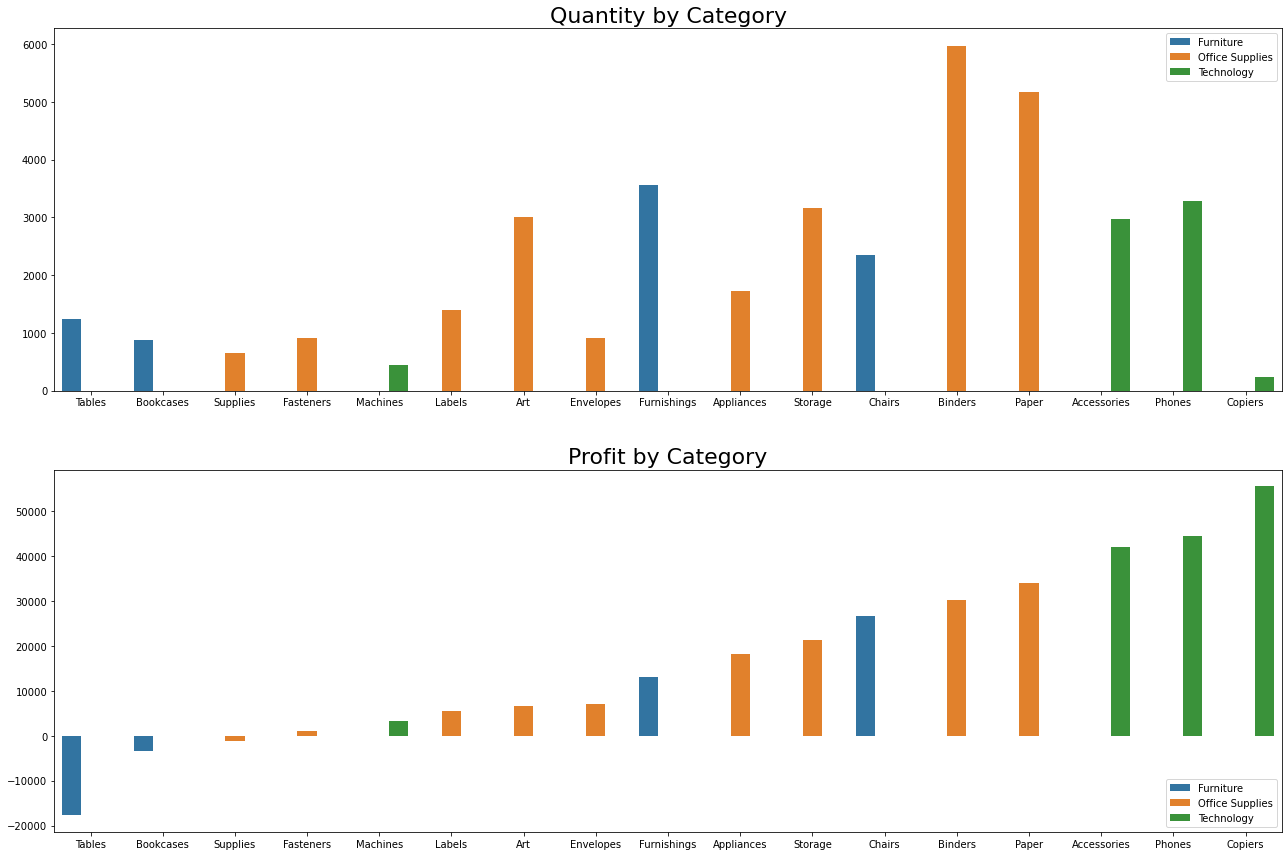

In [4]:
fig, ax = plt.subplots(2,1, figsize=(18,12))
df_groupby_category = df.groupby(["Category", "Sub-Category"])[["Quantity", "Profit"]].sum().sort_values(by=["Profit"])
category = list(df_groupby_category.index.map(lambda x : x[0]))
sub_category = list(df_groupby_category.index.map(lambda x : x[1]))

ax[0].set_title("Quantity by Category", fontsize=22)
sns.barplot(x=sub_category, y=df_groupby_category["Quantity"].values, ax=ax[0], hue=category)

ax[1].set_title("Profit by Category", fontsize=22)
sns.barplot(x=sub_category, y=df_groupby_category["Profit"].values, ax=ax[1], hue=category)

plt.tight_layout(h_pad=4)


As we can see from above
1. **Tables**, **Bookcases**, **Supplies** are the <font color="red">**Loss Making**</font> Sub-Category
2. **Copiers**, **Phones**, **Accessories** are the <font color="green">**Max Profit Making**</font> Sub-Category
3. **Copiers** have least produced but higest Profit maker 

In [5]:
df["Count"] = np.ones(shape=(df.shape[0], 1))

In [6]:
df.groupby(["Category", "Sub-Category"])["Count", "Sales", "Profit"].sum()

<ipython-input-6-d15e17c79c9a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Category", "Sub-Category"])["Count", "Sales", "Profit"].sum()


Count        Sales      Profit
Category        Sub-Category                                 
Furniture       Bookcases      228.0  114879.9963  -3472.5560
                Chairs         617.0  328449.1030  26590.1663
                Furnishings    957.0   91705.1640  13059.1436
                Tables         319.0  206965.5320 -17725.4811
Office Supplies Appliances     466.0  107532.1610  18138.0054
                Art            796.0   27118.7920   6527.7870
                Binders       1523.0  203412.7330  30221.7633
                Envelopes      254.0   16476.4020   6964.1767
                Fasteners      217.0    3024.2800    949.5182
                Labels         364.0   12486.3120   5546.2540
                Paper         1370.0   78479.2060  34053.5693
                Storage        846.0  223843.6080  21278.8264
                Supplies       190.0   46673.5380  -1189.0995
Technology      Accessories    775.0  167380.3180  41936.6357
                Copiers         68.0  149528.0300  55617.8249
                Machines       115.0  189238.6310   3384.7569
                Phones         889.0  330007.0540  44515.7306

## Interpretation from above Table

1. **Furniture** has **2 Loss Making Sub-Category**
2. **Office Supplies** has **1 Loss Making Sub-Category**
3. **Technology** has no loss making  

In [7]:
df.groupby("Category")["Category", "Count", "Sales"].sum()

<ipython-input-7-d23200fbbf88>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Category")["Category", "Count", "Sales"].sum()


,Count,Sales
Category,,
Furniture,2121.0,741999.7953
Office Supplies,6026.0,719047.0320
Technology,1847.0,836154.0330


1. From Above Table We can we **Technology** Category have <font color="green">**High Sales**</font>
2. Even though **Office Supplies** have <font color="red">**Less Sales**</font> then **Furniture** it contribute more to profit then **Furniture**

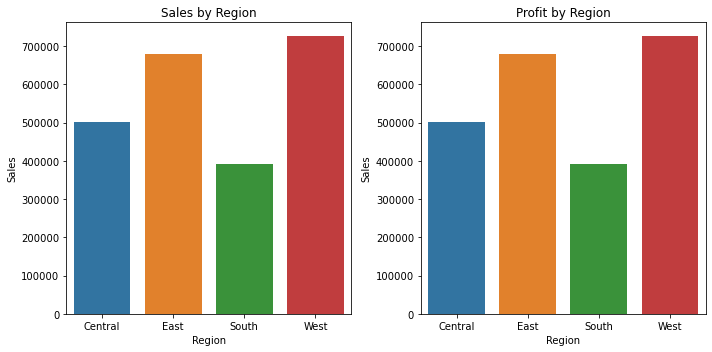

In [8]:
df_groupby_region = df.groupby("Region", sort=True)[["Sales", "Profit"]].sum()

fig, ax = plt.subplots(1 ,2, figsize=(10,5))

ax[0].set_title("Sales by Region")
sns.barplot(x=df_groupby_region.index, y=df_groupby_region["Sales"], ax=ax[0])

ax[1].set_title("Profit by Region")
sns.barplot(x=df_groupby_region.index, y=df_groupby_region["Sales"], ax=ax[1])

plt.tight_layout()

### From Above Table we can see

1. West Region has <font color="green">**High Sales and Profit**</font>
2. South Region has <font color="red">**Less Sales and Profit**</font>

In [9]:
df_group_by_sub_category = df.groupby("Sub-Category", sort=True)[["Discount", "Sales", "Profit"]].mean()

df_group_by_sub_category[df_group_by_sub_category["Profit"] < 0]

,Discount,Sales,Profit
Sub-Category,,,
Bookcases,0.211140,503.859633,-15.230509
Supplies,0.076842,245.650200,-6.258418
Tables,0.261285,648.794771,-55.565771


As we can see **Sales are decent** still **Profit is Negtive**. We can **Decrease Discount to Increase Profit**

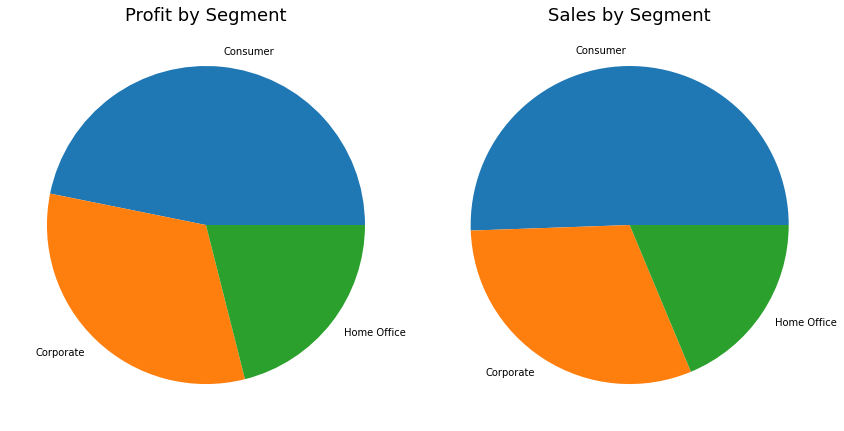

In [10]:
df_group = df.groupby("Segment")[["Profit", "Sales"]].sum()

fig, ax = plt.subplots(1 ,2, figsize=(12, 6))

ax[0].pie(x=df_group["Profit"], labels=df_group.index)
ax[0].set_title("Profit by Segment", fontsize=18)

ax[1].pie(x=df_group["Sales"], labels=df_group.index)
ax[1].set_title("Sales by Segment", fontsize=18)

plt.tight_layout()

### <font color="red">Home Office</font> is the segment with less profit and Sales

# Conclusion

1. **Furniture** is a category were <font color="red">**Profit is Less**</font>
2. **Tables**, **Bookcases**, **Supplies** are the <font color="red">**Loss Making**</font> Sub-Category
3. **Copiers**, **Phones**, **Accessories** are the <font color="green">**Max Profit Making**</font> Sub-Category
4. **Copiers** have least produced but higest Profit maker
5. **Technology** Category have <font color="green">**High Sales**</font>
6. Even though **Office Supplies** have <font color="red">**Less Sales**</font> then **Furniture** it contribute more to profit then **Furniture**
7. West Region has <font color="green">**High Sales and Profit**</font>
8. South Region has <font color="red">**Less Sales and Profit**</font>
9. **Home Office** is the segment with <font color="red">**less profit and Sales**</font>

<br>
<br>
<center><font size=25>Thank You</font></center>